<a href="https://colab.research.google.com/github/EvGdk/Machine-Learning-HSE/blob/master/Yargy_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ipymarkup==0.5.0 
!pip install yargy

     |████████████████████████████████| 51kB 2.2MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 7.1MB 8.4MB/s 


In [0]:
from yargy import Parser, rule, and_, or_

In [0]:
from yargy.predicates import (
    eq, in_, dictionary,
    type, gram, normalized)

In [0]:
from yargy.interpretation import fact, attribute

In [0]:
from ipymarkup import show_box_markup
from ipymarkup.palette import palette, RED, GREEN
from ipymarkup import show_markup

In [0]:
from yargy.pipelines import morph_pipeline

In [0]:
from IPython.display import display

In [0]:
text = " Купил за 5 или 6 евро,  потом 5 евро и 7 рублей, у меня украли 3000 евро"

In [0]:
Measure = fact(
    "Measure", ["amount", "currency"]
)

CURRENCY = morph_pipeline(['доллар', '$', 'рубль','цент','дирхам','евро', 'копейка']).interpretation(Measure.currency)
INT = rule(type('INT'))
FLOAT = rule(INT, in_(',.'), INT)


RANGE = rule(eq('от'), INT, eq('до'), INT) #не работает
RANGE2 = rule(INT, eq('-'), INT)
VARIANCE = rule(or_(INT, FLOAT), eq('или'), or_(INT, FLOAT))
AMOUNT = or_( INT,FLOAT,VARIANCE,
              RANGE2, RANGE).interpretation(Measure.amount)



measure = rule(AMOUNT, CURRENCY).interpretation(Measure)
parser = Parser(measure)


In [68]:
matches = list(parser.findall(text))
spans = [_.span for _ in matches] 
show_markup(text, spans)

BoxMarkup(' Купил за 5 или 6 евро,  потом 5 евро и 7 рублей, у меня украли 3000 евро',
          [Span(10, 22, None),
           Span(31, 37, None),
           Span(40, 48, None),
           Span(64, 73, None)])

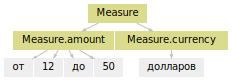

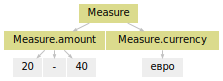

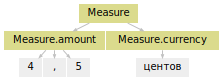

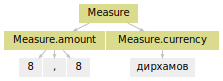

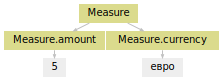

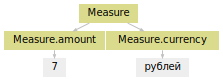

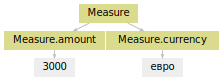

In [64]:
for match in matches:
    display(match.tree.as_dot)